### 1. Importing Libraries and Data preprocessing

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# set seed
seed = 42

In [4]:
# load csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [6]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, 
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [9]:
image_augmentation.fit(X_train)

### 2. Model Building

In [10]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [11]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [12]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [13]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 20s 2s/step - loss: 0.9462 - accuracy: 0.5547 - val_loss: 0.6795 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 18s 1s/step - loss: 0.9419 - accuracy: 0.5328 - val_loss: 0.6770 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.8820 - accuracy: 0.5595 - val_loss: 0.6799 - val_accuracy: 0.5637
Epoch 4/50
13/13 [==============================] - 17s 1s/step - loss: 0.9311 - accuracy: 0.5468 - val_loss: 0.6769 - val_accuracy: 0.5623
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.8948 - accuracy: 0.5626 - val_loss: 0.6750 - val_accuracy: 0.5609
Epoch 6/50
13/13 [==============================] - 19s 1s/step - loss: 0.8811 - accuracy: 0.5674 - val_loss: 0.6754 - val_accuracy: 0.5779
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.8719 - acc

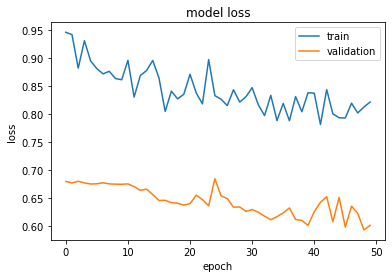

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

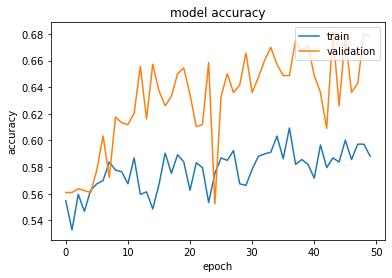

In [16]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
print('Training Accuracy: ', accuracy_score(y_train, model.predict_classes(X_train)[:,0]))
print('\nValidation Accuracy: ', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Training Accuracy:  0.695625759416768

Validation Accuracy:  0.6784702549575071
